In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6)

In [ ]:
penguins_directory = "/content/drive/MyDrive/penguins/penguins_size.csv"

penguins = pd.read_csv(penguins_directory)
print(penguins.shape)
#penguins = penguins.dropna()
#print(penguins.shape)

(344, 7)


In [ ]:
#pd.set_option('display.max_rows', None)
#penguins

In [ ]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
penguins.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

# Missing Data ?

In [ ]:
for col in penguins.columns:
  missing = np.sum(penguins[col].isnull())
  pct_missing = np.mean(penguins[col].isnull())
  print("{} - {}/{} ({}%)".format(col, missing, penguins.shape[0], pct_missing))

species - 0/344 (0.0%)
island - 0/344 (0.0%)
culmen_length_mm - 2/344 (0.005813953488372093%)
culmen_depth_mm - 2/344 (0.005813953488372093%)
flipper_length_mm - 2/344 (0.005813953488372093%)
body_mass_g - 2/344 (0.005813953488372093%)
sex - 10/344 (0.029069767441860465%)


In [ ]:
# We drop missing values

penguins = penguins.dropna()
penguins.shape

(334, 7)

In [ ]:
# There is something strange...

penguins['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
# We clean our dataset:
penguins[penguins.sex == '.']
#penguins[penguins.index == 336].index
penguins = penguins.drop(penguins[penguins.index == 336].index)


# Scatter Plot

In [ ]:
print(penguins['island'].unique())
print(penguins['species'].unique())

['Torgersen' 'Biscoe' 'Dream']
['Adelie' 'Chinstrap' 'Gentoo']


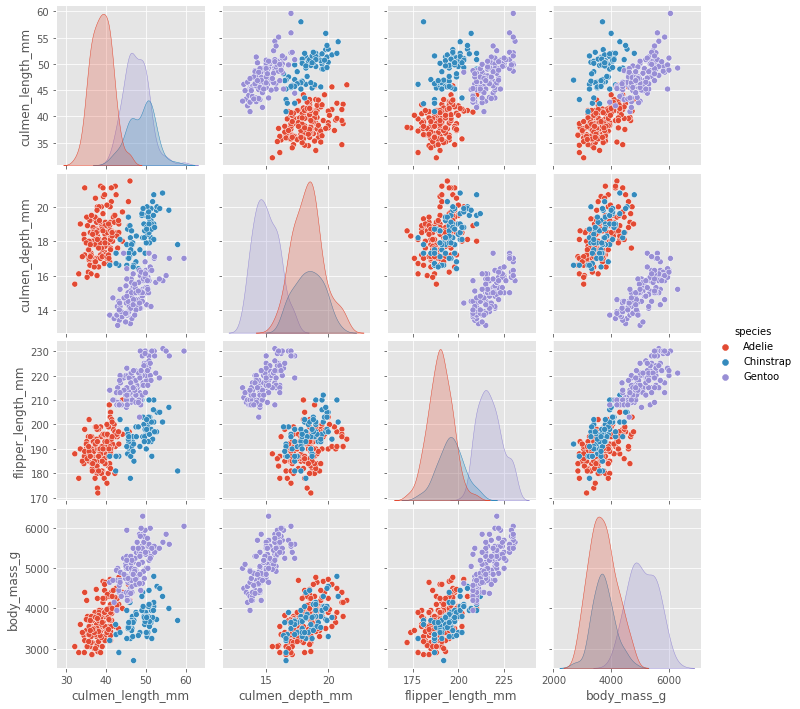

In [ ]:
sns.pairplot(penguins, hue='species')

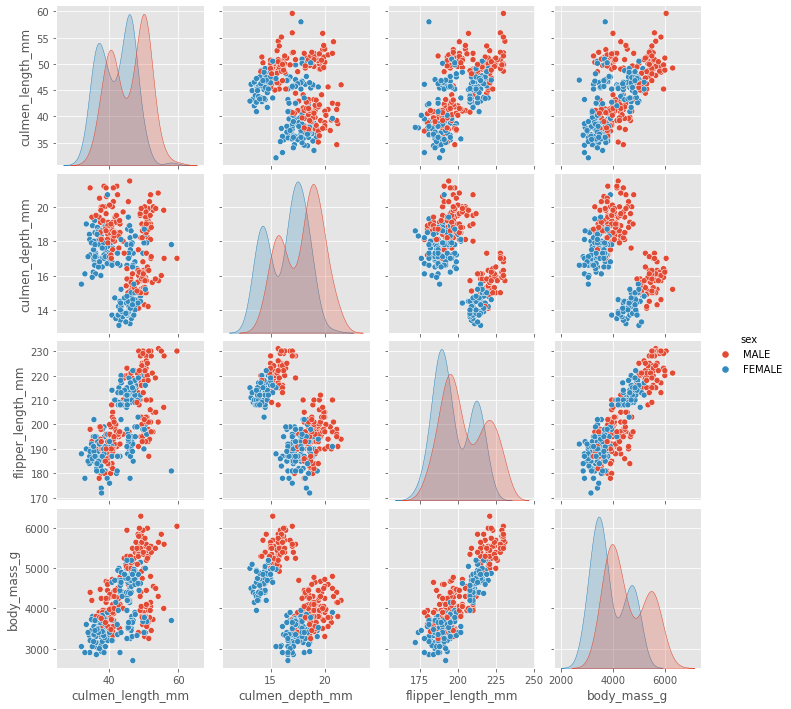

In [ ]:
sns.pairplot(penguins, hue='sex')

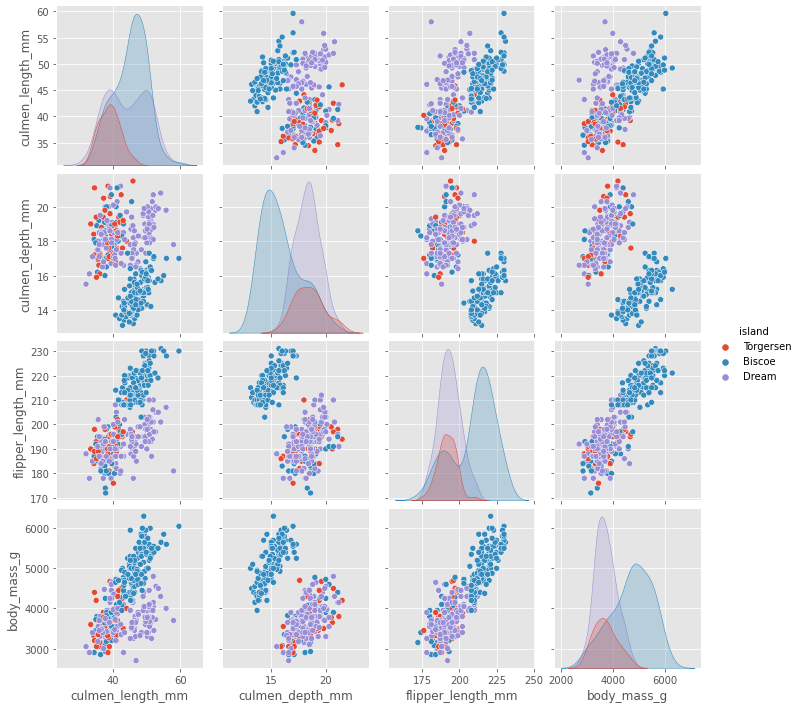

In [ ]:
sns.pairplot(penguins, hue='island')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

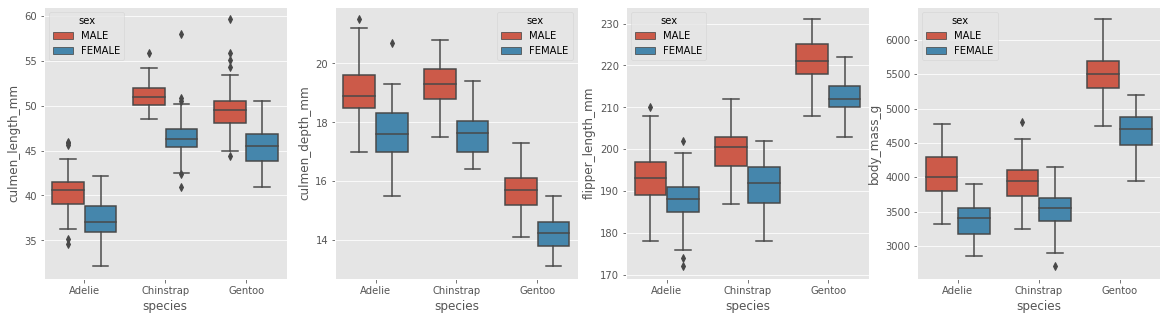

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(20,5))

sns.boxplot(penguins['species'], penguins['culmen_length_mm'], hue=penguins['sex'], ax=axs[0])
sns.boxplot(penguins['species'], penguins['culmen_depth_mm'], hue=penguins['sex'], ax=axs[1])
sns.boxplot(penguins['species'], penguins['flipper_length_mm'], hue=penguins['sex'], ax=axs[2])
sns.boxplot(penguins['species'], penguins['body_mass_g'], hue=penguins['sex'], ax=axs[3])

# Regression Plot

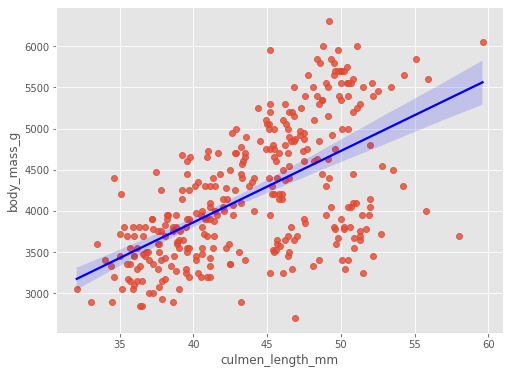

In [ ]:
sns.regplot(x='culmen_length_mm', y='body_mass_g', data=penguins, line_kws={'color':'b'})

# Correlation

In [ ]:
penguins.corr() # pearson correlation

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.228640,0.652126,0.589066
culmen_depth_mm,-0.228640,1.000000,-0.578730,-0.472987
flipper_length_mm,0.652126,-0.578730,1.000000,0.873211
body_mass_g,0.589066,-0.472987,0.873211,1.000000


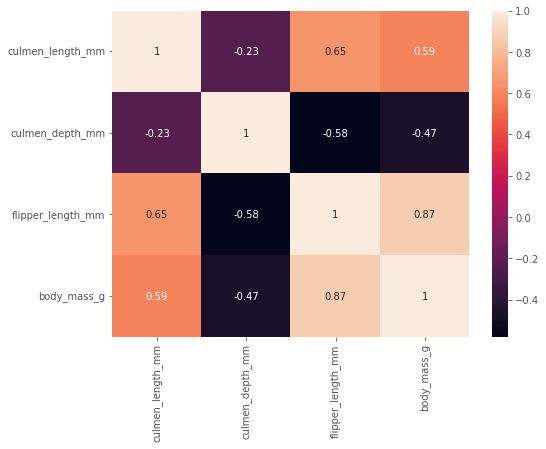

In [ ]:
corr_matrix = penguins.corr()
sns.heatmap(corr_matrix, annot=True)


In [ ]:
corr_pairs = corr_matrix.unstack()
corr_pairs.sort_values(ascending=False)

culmen_length_mm   culmen_length_mm     1.000000
culmen_depth_mm    culmen_depth_mm      1.000000
flipper_length_mm  flipper_length_mm    1.000000
body_mass_g        body_mass_g          1.000000
flipper_length_mm  body_mass_g          0.873211
body_mass_g        flipper_length_mm    0.873211
culmen_length_mm   flipper_length_mm    0.652126
flipper_length_mm  culmen_length_mm     0.652126
culmen_length_mm   body_mass_g          0.589066
body_mass_g        culmen_length_mm     0.589066
culmen_length_mm   culmen_depth_mm     -0.228640
culmen_depth_mm    culmen_length_mm    -0.228640
                   body_mass_g         -0.472987
body_mass_g        culmen_depth_mm     -0.472987
culmen_depth_mm    flipper_length_mm   -0.578730
flipper_length_mm  culmen_depth_mm     -0.578730
dtype: float64

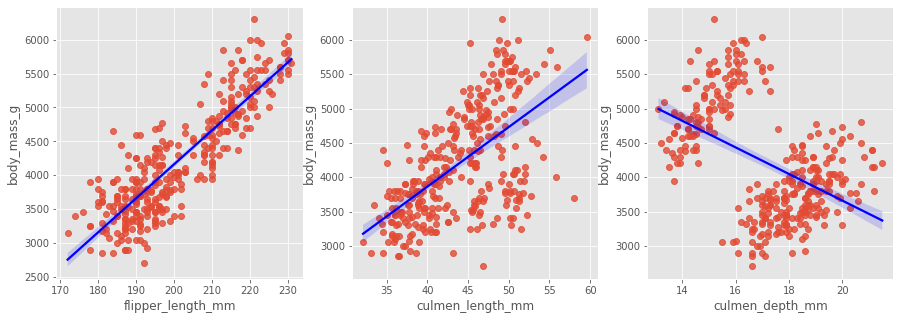

In [ ]:
# We represent the most correlated features:
fig, axs = plt.subplots(1,3, figsize=(15,5))

sns.regplot(ax=axs[0], x='flipper_length_mm', y='body_mass_g', data=penguins, line_kws={'color':'b'})
sns.regplot(ax=axs[1], x='culmen_length_mm', y='body_mass_g', data=penguins, line_kws={'color':'b'})
sns.regplot(ax=axs[2], x='culmen_depth_mm', y='body_mass_g', data=penguins, line_kws={'color':'b'})

# One-Hot Encoding

In [ ]:
penguins_num = penguins

# Bar Charts

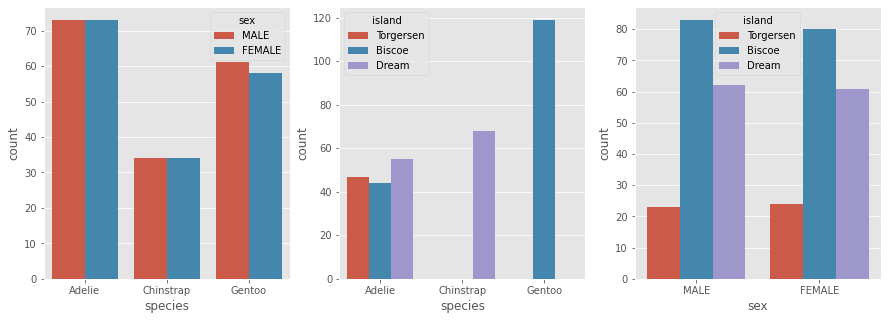

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.countplot(x='species', hue='sex', data=penguins, ax=axs[0])
sns.countplot(x='species', hue='island', data=penguins, ax=axs[1])
sns.countplot(x='sex', hue='island', data=penguins, ax=axs[2])

# LINEAR REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
y = penguins.body_mass_g
features = [#'culmen_length_mm', 
            #'culmen_depth_mm',
            'flipper_length_mm'
            ]
X = penguins[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 26)

In [ ]:
model = LinearRegression()
model.fit(train_X, train_y)
val_predictions = model.predict(val_X)

print("R2: {}".format(model.score(train_X, train_y)))
print("MSE: {}".format(mean_squared_error(val_y, val_predictions)))

R2: 0.7592957737696551
MSE: 145399.21828409654


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('body_mass_g ~ flipper_length_mm', data=penguins).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          3.13e-105
Time:                        02:01:58   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.28